# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [25]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [26]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


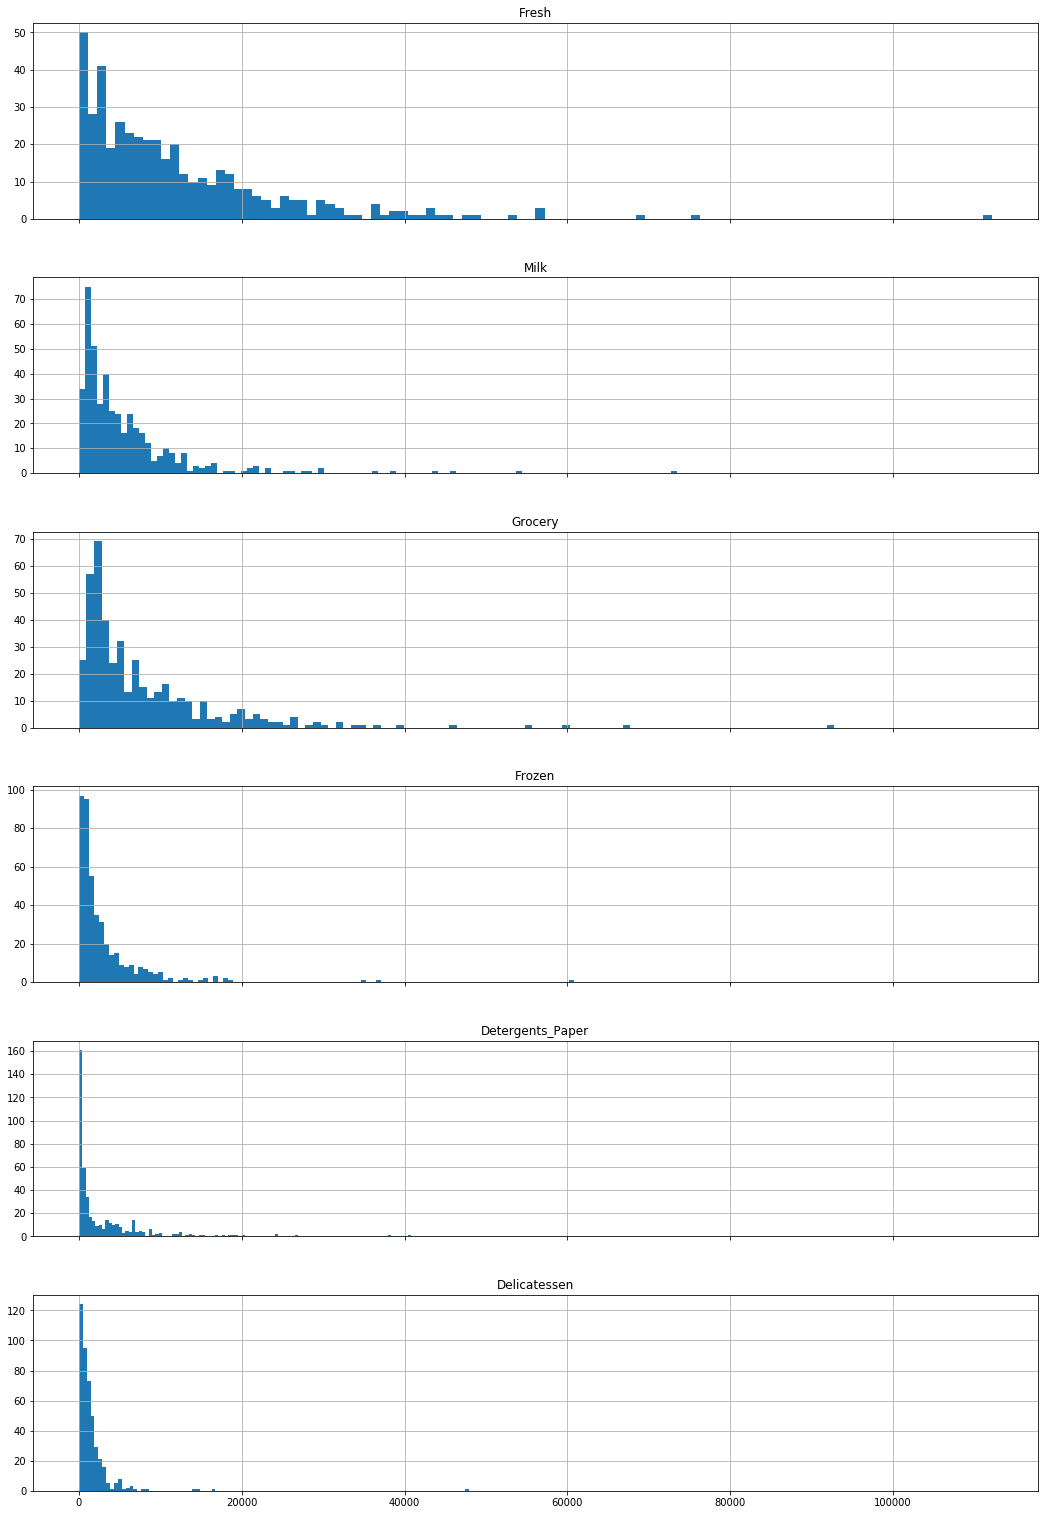

In [27]:
# the data is largely skewed, we can also see the graph on below
import matplotlib.pyplot as plt

f, axes = plt.subplots(6, sharex=True, figsize=(18, 27))
for col, axis in zip(data.columns, axes):
    data.hist(column = col, bins = 100, ax=axis)

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [28]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [39, 53, 343]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

# samples different from mean 
print "Samples different from mean: "
display(samples - data.mean().values)

# samples different from median 
print "Samples different from median: "
display(samples - data.median().values)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,56159,555,902,10002,212,2916
1,491,10473,11532,744,5611,224
2,1689,6964,26316,1456,15469,37


Samples different from mean: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,44158.702273,-5241.265909,-7049.277273,6930.068182,-2669.493182,1391.129545
1,-11509.297727,4676.734091,3580.722727,-2327.931818,2729.506818,-1300.870455
2,-10311.297727,1167.734091,18364.722727,-1615.931818,12587.506818,-1487.870455


Samples different from median: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,47655.0,-3072.0,-3853.5,8476.0,-604.5,1950.5
1,-8013.0,6846.0,6776.5,-782.0,4794.5,-741.5
2,-6815.0,3337.0,21560.5,-70.0,14652.5,-928.5


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Frozen: 3071.9
* Grocery: 7951.2
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

As stated above, the mean and median on the data have a large gap (median is below the mean), so we can conclude that this data is skewed.

Firstly, we need to identify the type of the customers or establishment this wholesale interact with, in my opinion we can catagorize the customer as:


* Restaurant - sell a food, usually needs fresh and frozen.
* Supermarkets - sell a variety of foods and household products such as fresh, mlik, frozen, detergents paper.
* Hypermarkets - sell a wide range of products, more than supermarkets. Usually delicatessen also can found here.
* Warehouse store - sell a grocery and detergents paper
* Convenience Store - sell a small part of frozen and grocery
* Food Retailer - sell more of frozen, fresh, milk and delicatessen

Now we can categorize the customer as we defined above:

* Index(0), customer 39 - The data aboves gives information that the customer heavily spent on Fresh, Frozen and delicatessen. They spent less on Grocery, Detergents_paper and milk. We can  assume that this customer face directly to the end customer like restaurants and food retailer

* Index(1), customer 53 - Opposite from customer 39, this customer spent quite large on Milk, Grocery and Detergents_paper (above the mean) and less for others. So we can conclude that this type of customer also sells non-food products like warehouse, supermarkets and hypermarkets.

* Index(2), customer 343 - This type of customer spent more on detergents_paper, milk and grocery, and the others quite same like the mean. we can also conclude that this type of customer sells non-food products and can be categorize same as customer 53.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

columns = list(data.columns.values)

for i in columns:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([i], axis=1, inplace = False)

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[i], test_size=0.25, random_state=4)

    # TODO: Create a decision tree regressor and fit it to the training set
    avg_scores = []   # average the scores of random_state
    for rand in range(1, 100):
        regressor = DecisionTreeRegressor(random_state=rand)
        regressor.fit(X_train, y_train)
        # TODO: Report the score of the prediction using the testing set
        score = regressor.score(X_test, y_test)
        avg_scores.append(score)
    print "Score with %s as the target: %s" % (i, np.array(avg_scores).mean())

Score with Fresh as the target: -0.51792699721
Score with Milk as the target: 0.489688550114
Score with Grocery as the target: 0.702723959478
Score with Frozen as the target: -0.176038671125
Score with Detergents_Paper as the target: 0.695469205941
Score with Delicatessen as the target: -9.29949385448


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to believe that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

Some of the result printed above have a negative score (Delicatessen, Frozen and Fresh) while the others is positive (Detergents_Paper, Milk and Grocery). As we know that `R^2` compares the fit of the chosen model with a horizontal straight line (mean). Negative means that the model fits worse than horizontal line and does not follow the trend of the data while positive means that the model follow the trends or can be predicted using others features.

As we see the result grocery score is the highest, about 70% followed by detergents_paper for 69% while the others is below 50%. It seems that grocery and detergents_paper can easily explained by using other features, but overall we can see the customer spending habits can't really explained by using other features

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

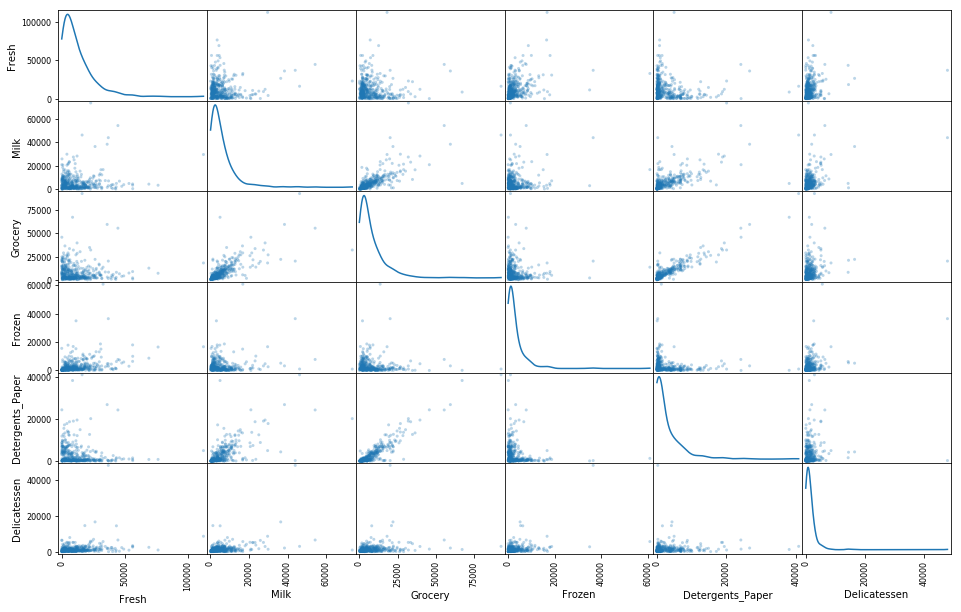

In [30]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (16,10), diagonal = 'kde');

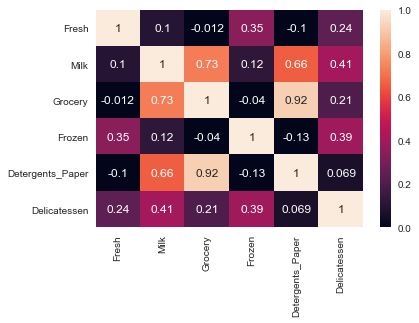

In [31]:
# Correlation using heatmap
sns.set()
corrleation_data = data.corr()
ax = sns.heatmap(corrleation_data, annot=True, vmin=0, vmax=1)

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

The data provided on scatter matrix and heatmap depicts the correlation between features on wholesale customers dataset. We can see the Kernel Density Estimation (KDE) on the diagonal of scatter matrix plot is skewed. So the data is not normally distributed. For correlation, we can see from heatmap charts that grocery ~ detergent_papers have the largest correlation just about 0.92, followed by grocery ~ milk about 0.73 and detergents_papers ~ milk with score 0.66. 

In summary, we are able to draw out from the heatmap charts that the customer that bought grocery tend to bought detergent_papers and milk together.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

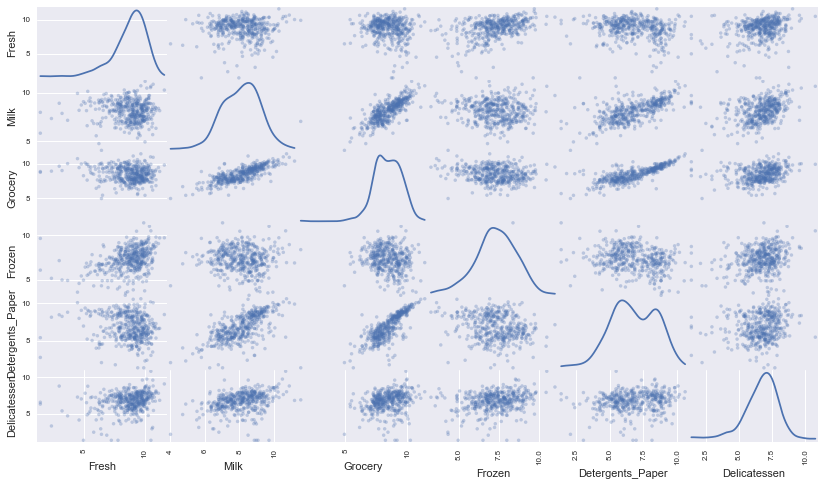

In [32]:
from scipy import stats
# using box-cox test
box_cox_data = data.apply(lambda x: pd.Series(stats.boxcox(x)[0]))

# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x + 1))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x + 1))

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [33]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.935960,6.320768,6.805723,9.210640,5.361292,7.978311
1,6.198479,9.256651,9.352968,6.613384,8.632662,5.416100
2,7.432484,8.848653,10.177970,7.284135,9.646658,3.637586


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [34]:
# For each feature find the data points with extreme high or low values
outlier_index = {}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    iqr= Q3 -Q1
    step = 1.5 * iqr  # step for inner fence (for outer fence use 3 as multiplier)
        
    data_outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    outlier_index[feature] = list(data_outlier.index.values)  # get outlier index
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(data_outlier)
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []  # [65, 128, 66, 154, 154, 75, 154]
feature_names = list(log_data.columns.values)
temp_features_names = list(log_data.columns.values)

for i in feature_names:
    temp_features_names.remove(i)
    for j in temp_features_names:
        outliers += list(set(outlier_index[i]) & set(outlier_index[j]))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
81,5.393628,9.163354,9.575261,5.648974,8.964312,5.056246
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
171,5.303305,10.160569,9.894295,6.480045,9.079548,8.740497
193,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790
218,2.944439,8.923325,9.629445,7.159292,8.475954,8.759826
304,5.087596,8.917445,10.117550,6.426488,9.374498,7.787797


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
145,10.000614,9.034200,10.457171,3.761200,9.440817,8.396381
175,7.759614,8.967759,9.382191,3.970292,8.342125,7.437206
264,6.979145,9.177817,9.645105,4.127134,8.696343,7.143618
325,10.395681,9.728241,9.519808,11.016496,7.149132,8.632306
420,8.402231,8.569216,9.490091,3.258097,8.827468,7.239933
429,9.060447,7.467942,8.183397,3.871201,4.442651,7.824846
439,7.933080,7.437795,7.828436,4.189655,6.169611,3.970292


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
137,8.035279,8.997271,9.021961,6.495266,6.582025,3.610918
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
183,10.514557,10.690831,9.912001,10.506026,5.480639,10.777789
184,5.793014,6.823286,8.457655,4.317488,5.814131,2.484907
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294
203,6.369901,6.530878,7.703910,6.152733,6.861711,2.944439


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

Outliers are on the statistical issues (mostly created due measurement errors) and most of parametric statistics, like means, variances, correlations, etc is sensitive to outliers. clustering algorithm also sensitive to outliers (like K-Means). **My opinion regarding to outliers on this data is if there are outliers appear twice on features then we should drop the outlier.** 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

explained variance 0 : 44.3746056417
explained variance 1 : 27.6672820245
explained variance 2 : 11.5098800267
explained variance 3 : 9.58915736939
explained variance 4 : 4.57359841314
explained variance 5 : 2.28547652459
The first two principal components: 0.720418876662
The first four principal components: 0.931409250623


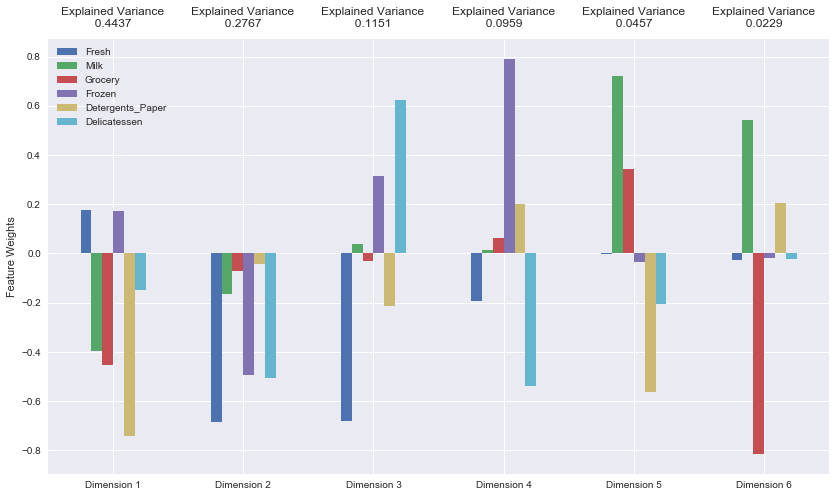

In [35]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(log_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

for index, i in enumerate(pca.explained_variance_ratio_):
    print 'explained variance {0} : {1}'.format(index, i*100)

print 'The first two principal components: {}'.format(pca.explained_variance_ratio_[:2].sum())
print 'The first four principal components: {}'.format(pca.explained_variance_ratio_[:4].sum())

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

* The first principal components explain about 44.37% of the variances and for the second principal components, it explains about 27.67% variances. The total variances explained by the first and second PC is about 72%.

* When we combined the first four principal components, it will explain about 93.1% variance (the third and the fourth pc is 11.5% and 9.5% respectively)

* In first dimension of PC, there are high correlation between Milk, Grocery and Detergents_paper like i mentioned earlier. It indicates the customer that bought milk, grocery, detergent_papers and little delicatessen won't buy Fresh and frozen

* for the second dimension of PC, it relies on fresh, frozen and delicatessen. It make the 2nd PC orthogonal to the 1st PC.

* The third dimension of PC, customer that spent on delicatessen and frozen won't but fresh. And lastly the fourth dimension of PC, the customer that spent on Frozen does not spend on delicatessen.

*notes: the +/- on PC values can be flips (it's random)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [36]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.0479,-2.6259,0.2055,-0.0369,-1.3918,-0.0566
1,-2.6130,2.3722,0.3449,1.0655,0.3777,0.3583
2,-2.9828,2.0587,-1.6489,2.5691,0.1354,-0.3352


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [37]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca_2 = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca_2.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca_2.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [38]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.0500,-2.5713
1,-2.5876,2.4123
2,-2.9526,2.0670


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

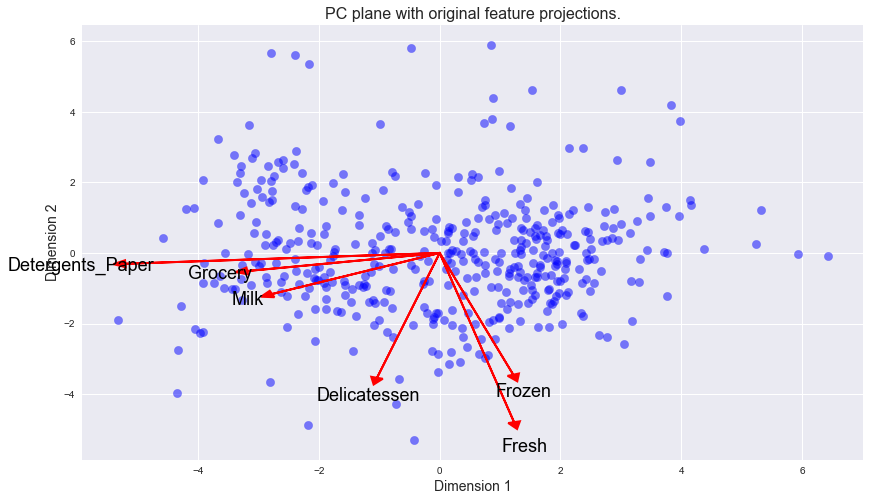

In [39]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**answers**:

Yes it does, the pca_result that i obtained earlier is same as observation on the above. Where the first component strongly correlated with `'Milk'`, `'Grocery'` and `'Detergents_Paper'` and for the second component correlated with `'Delicatessen'`, `'Frozen'` and `'Fresh'`

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* **Gaussian Mixture Model (GMM)**: It is a probabilistic models (it gives a distribution of possible outcome) that assumues the observed data is made up of mixture of several Gaussian Distributions. GMM is on of soft clustering methods where we can assign a data point more than one cluster. The result of the shape of clusters generated can be ellipses or sphere (flexible, not circular)

* **K-Means**: K-Means is one of the simplest algorithm as unsupervised learning method and also fast. It aims to partition *n* observation into *k* clusters with the nearest mean (euclidean distance). Unlike Gaussian Mixture, K-Means requires the cluster to be fixed size and symmetrical (circular), this makes K-Means very fast but not flexible in terms of shape. K-Means performs hard clustering which means the data point is assigned to one and only one cluster.

*Because data is quite spreads, i think K-Means will perform better, because Gaussian Mixture is better to fit a streched dataset where we can see the patterns.*

Cluster references:

* https://shapeofdata.wordpress.com/2013/07/30/k-means/
* https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
* https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian
* http://classes.engr.oregonstate.edu/eecs/fall2011/cs434/notes/GMM-14.pdf

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [40]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
def n_clusters(n, cluster_algoritm):
    param = {
        'kmeans': {'n_clusters':n, 'random_state':29},
        'gmm': {'n_components':n, 'covariance_type': 'spherical', 'random_state':29}
    }

    clusterer = {
        'kmeans' : KMeans(**param['kmeans']).fit(reduced_data),
        'gmm' : GaussianMixture(**param['gmm']).fit(reduced_data)
    }
    # TODO: Predict the cluster for each data point
    preds = {
        'kmeans' : clusterer['kmeans'].predict(reduced_data),
        'gmm' : clusterer['gmm'].predict(reduced_data)
    }
    # TODO: Find the cluster centers
    centers = {
        'kmeans': clusterer['kmeans'].cluster_centers_,
        'gmm': clusterer['gmm'].means_
    }
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = {
        'kmeans' : clusterer['kmeans'].predict(reduced_samples),
        'gmm' : clusterer['gmm'].predict(reduced_samples)
    }
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = {
        'kmeans': silhouette_score(reduced_data, preds['kmeans'], metric='euclidean'),
        'gmm': silhouette_score(reduced_data, preds['gmm'], metric='euclidean'),
    }
    return score[cluster_algoritm]

In [49]:
algo_name = 'kmeans'
for i in range(2, 7):
    print 'score by {} of clusters for {}: {}'.format(i, algo_name, n_clusters(i, algo_name))

score by 2 of clusters for kmeans: 0.426877212363
score by 3 of clusters for kmeans: 0.397952878275
score by 4 of clusters for kmeans: 0.331760618074
score by 5 of clusters for kmeans: 0.349495035227
score by 6 of clusters for kmeans: 0.362362696066


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
The best silhouette score that we get is using 2 clusters. After using 4 clusters, the score is becoming higher again.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

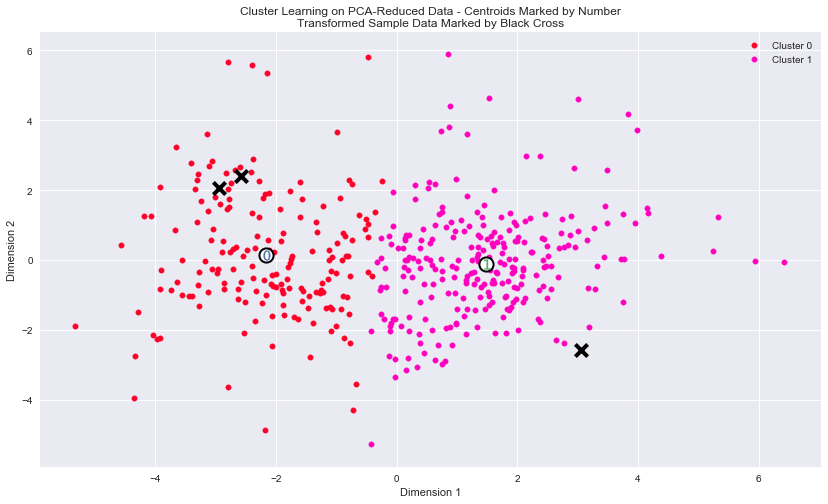

In [42]:
# using 2 clusters
param = {'n_clusters':2, 'random_state':29}
clusterer = KMeans(**param).fit(reduced_data)            

preds = clusterer.predict(reduced_data)

centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(reduced_samples)

vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [43]:
# TODO: Inverse transform the centers
log_centers = pca_2.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4017.0,7917.0,12127.0,954.0,4552.0,1041.0
Segment 1,8878.0,1895.0,2475.0,2091.0,297.0,685.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

In [53]:
print 'centers offset from mean'
good_unscaled_data = data.drop(data.index[outliers]).reset_index(drop = True)
display(true_centers - np.around(good_unscaled_data.mean(), decimals=3))

print 'centers offset from median'
good_unscaled_data = data.drop(data.index[outliers]).reset_index(drop = True)
display(true_centers - np.around(good_unscaled_data.median(), decimals=3))

centers offset from mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-8072.372,2128.897,4215.841,-2142.126,1703.526,-495.798
Segment 1,-3211.372,-3893.103,-5436.159,-1005.126,-2551.474,-851.798


centers offset from median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-4548.0,4283.0,7370.0,-587.0,3739.0,74.0
Segment 1,313.0,-1739.0,-2282.0,550.0,-516.0,-282.0


**Answer:**

The table above gives information about two clusters (segment) centers offset from mean. We can see that segment 0 is the customer that heavily purchased milk, grocery and a bit of detergents paper, while on segment 1 is the customer that purchased lot of frozen and fresh eventhough still below the mean. 

So these two clusters divide wholesale customer in 2 categories, the first is customer that sell non-foods and food(less) and the second is the customer that sell food.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [45]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

As i mention on above, There are too much categories to assume before, but now we can conclude that the customers is divides into 2 big categories:
 
* customer that sell goods and less food (purchased lot of grocery, milk and detergent_papers and less for others), for example like *supermarket*, *retailer*, *hypermarkets* and *warehouse store* (segment 0)
* customer that sell food and processed the food themselves for end customers (purchased lot of fresh, delicatessen and frozen and less for others) sucs as *restaurants* and *food retailers* (segment 1)

Now we can categorize again the customers as we defined above:

* **Index(0), customer 39** - we can see that it seems this kind of customer have a lot of fresh food, delicatessen and frozen products, it is likely to be in **segment 1**
* **Index(1), customer 53** - From this sample, we can learn that the customer have a lot of variety products, but not delicatessen. it is on **segment 0**
* **Index(2), customer 343** - Dominated by Grocery and Detergents Paper products, it is **segment 0**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

If the wholsesale is considering to change it delivery to be faster, it can be implemented on customer on cluster 1 (segment 1). The customer on cluster 1 needs a lot of fresh food and delicatessen so we can assume that it serve customer directly. But just to be safe, we could not conclude to early so we need to implement A/B testing first.

Taken from netflix, *"The general concept behind A/B testing to create an experiment with a control group and on or more experimental group which receive alternative treatments"*. To run A/B testing for delivery service, we can test two groups by selects sample of customers from each cluster and using the remainder of their cluster as the control group. (each cluster contains two groups: control and experimental). The experimental groups will receive the 3-day per week schedule while the control group use the default treatment. This would give us data on how the 3-day per week schedule affects customers in both clusters, whether it has good effects or not.

Sources:

* https://medium.com/netflix-techblog/its-all-a-bout-testing-the-netflix-experimentation-platform-4e1ca458c15
* https://www.quora.com/When-should-A-B-testing-not-be-trusted-to-make-decisions/answer/Edwin-Chen-1

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

we set the **customer segment** as the target variables, and use the others variables (fresh, frozen, delicatessen, grocery, milk and detergents_paper) as features. We will train using original data and use any classification algorithm to predict the **customer segment** on new data.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

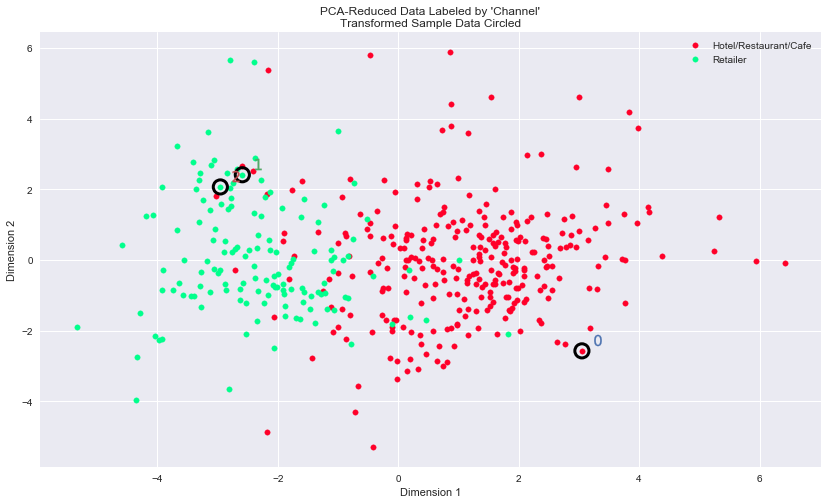

In [46]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

The number of cluster matches the number of channels, moreover the new categorize fit the underlying channel distribution. Although few of them on is on wrong category (some red points on green zone and vice versa), we can conclude that segment 0 is '`Retail`' and segment 1 is `'Hotels/Restaurants/Cafes'`.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.